In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [214]:
data_train = pd.read_csv('train.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## preprocess

In [215]:
data_train = data_train.replace(['female', 'male'], [0, 1])
data_train = data_train.replace(['s', 'c', 'q'], [0, 1, 2])
data_train = data_train.fillna(0)
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",1,0.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0,C


In [216]:
X_train = np.array(data_train[['Pclass', 'Sex', 'Age','SibSp', 'Parch']])
Y_train = np.array(data_train[['Survived']])

#X_train.shape
#Y_train.shape

## model

In [217]:
model = tf.keras.models.Sequential([
    Dense(5, activation='relu'),
    Dense(28, activation='relu'),
    Dense(16, activation='relu'),
    Dense(4, activation='relu'),
    Dense(2, activation='softmax')
])

In [218]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.losses.sparse_categorical_crossentropy,
              #loss=tf.losses.mean_squared_error
              metrics=['accuracy'])

## train

In [219]:
# train

train_output = model.fit(X_train, Y_train, epochs=200)

Epoch 1/200
28/28 [==============================] - 1s 2ms/step - loss: 0.6860 - accuracy: 0.5735
Epoch 2/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.6162
Epoch 3/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.6162
Epoch 4/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.6229
Epoch 5/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.6622
Epoch 6/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5614 - accuracy: 0.7374
Epoch 7/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5396 - accuracy: 0.7553
Epoch 8/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5091 - accuracy: 0.7744
Epoch 9/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.7924
Epoch 10/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7912
Epoch 11/

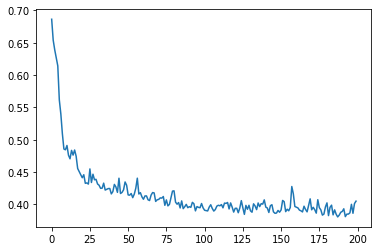

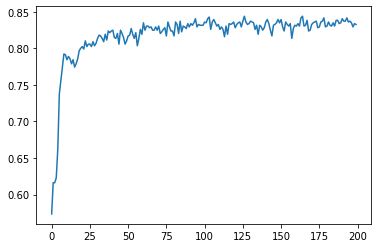

In [220]:
plt.plot(train_output.history['loss'])
plt.show()
plt.plot(train_output.history['accuracy'])
plt.show()

In [221]:
model.save('train_titanic.h5')

# model = tf.keras.models.load_model('train_titanic.h5')

## test

In [222]:
data_test = pd.read_csv('test.csv')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [223]:
data_test = data_test.replace(['female', 'male'], [0, 1])
data_test = data_test.replace(['S', 'C', 'Q'], [0, 1, 2])
data_test = data_test.fillna(0)
data_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,2
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,0
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,0,0
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,0,2
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,0,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,0,1
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,0,0


In [224]:
data_test_survived = pd.read_csv('gender_submission.csv') 
data_test_survived.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [225]:
X_test = np.array(data_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']])
Y_test = np.array(data_test_survived[['Survived']])

model.evaluate(X_test, Y_test)

14/14 [==============================] - 0s 1ms/step - loss: 0.3475 - accuracy: 0.8565


[0.347499281167984, 0.8564593195915222]

In [226]:
jack = np.array([[1, 1, 30, 0, 0]])

result = model.predict(jack)
np.argmax(result)

0

## KNN

In [227]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [228]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [229]:
Y_pred = knn_model.predict(X_test)

In [230]:
knn_accuracy = accuracy_score(Y_test, Y_pred)
knn_accuracy

0.7655502392344498

## Perceptron

In [231]:
class Perceptron:
    def __init__(self, lr_w=0.0001, lr_b=0.1, epochs=10):
        # init params
        self.w = np.random.rand(1, 5)
        self.b = np.random.rand(1, 1)

        # hyper parameters
        self.lr_w = lr_w
        self.lr_b = lr_b
        self.epochs = epochs
        self.Errors = []
        self.Errors_test = []
        
    def fit(self, X_train, Y_train):
        # train
        for epoch in range(self.epochs):
            for i in range(X_train.shape[0]):
                x = X_train[i]
                y = Y_train[i]

                y_pred = np.matmul(x, self.w.T) + self.b
                e = y - y_pred

                # update
                self.w += self.lr_w * e * x
                self.b += self.lr_b * e * 1
    
    def predict(self, X_test):
        y_pred = np.matmul(X_test, self.w.T) + self.b
        return y_pred
    def evaluate(self, X_test, Y_test):
        Y_pred = np.matmul(X_test, self.w.T) + self.b
        Error = Y_test - Y_pred
        MSE = np.mean(Error**2)
        return MSE

In [232]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
evaluate = perceptron.evaluate(X_test, Y_test)
evaluate

0.40670382616019723

In [233]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
perceptron_accuracy = accuracy_score(Y_test, Y_pred)
perceptron_accuracy

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6578947368421053